## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [15]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [16]:
df = pd.read_csv('Cold_Storage.csv')

#### Show Top 5 Records

In [17]:
df.head()

,Temperature,Humidity,Oxygen,Carbon Dioxide,Nitrogen,Ethylene,Sulfur Dioxide,Moisture Control,Crop
0,4,90,4,5,94,0,0,93,apple
1,3,91,3,3,96,0,0,93,apple
2,1,93,2,3,92,0,0,91,apple
3,4,90,1,5,90,0,0,93,apple
4,3,95,1,5,90,0,0,90,apple


#### Preparing X and Y variables

In [18]:
X = df.drop(columns=['Crop'],axis=1)

In [19]:
X.head()

,Temperature,Humidity,Oxygen,Carbon Dioxide,Nitrogen,Ethylene,Sulfur Dioxide,Moisture Control
0,4,90,4,5,94,0,0,93
1,3,91,3,3,96,0,0,93
2,1,93,2,3,92,0,0,91
3,4,90,1,5,90,0,0,93
4,3,95,1,5,90,0,0,90


In [20]:
print("Categories in 'Temperature' variable:     ",end=" " )
print(df['Temperature'].unique())

print("Categories in 'Humidity' variable:  ",end=" ")
print(df['Humidity'].unique())

print("Categories in'Oxygen' variable:",end=" " )
print(df['Oxygen'].unique())

print("Categories in 'Carbon Dioxide' variable:     ",end=" " )
print(df['Carbon Dioxide'].unique())

print("Categories in 'Nitrogen' variable:     ",end=" " )
print(df['Nitrogen'].unique())

print("Categories in 'Ethylene' variable:     ",end=" " )
print(df['Ethylene'].unique())

print("Categories in 'Sulfur Dioxide' variable:     ",end=" " )
print(df['Sulfur Dioxide'].unique())

print("Categories in 'Moisture Control' variable:     ",end=" " )
print(df['Moisture Control'].unique())

Categories in 'Temperature' variable:      [ 4  3  1  2  0 10 14 13 11 12 15 17 16 18 20 19  7  9  5  8  6 28 27 25
 26]
Categories in 'Humidity' variable:   [90 91 93 95 92 94 54 51 58 50 53 56 57 55 59 52 60 15 14 13 12 86 87 88
 85 89 70 62 61 66 63 65 68 67 64 69]
Categories in'Oxygen' variable: [4 3 2 1 5]
Categories in 'Carbon Dioxide' variable:      [ 5  3  2  4 16 12 15 13 14  7  6  8 10  9  1]
Categories in 'Nitrogen' variable:      [94 96 92 90 93 97 91 95 84 82 86 81 80 85 83 79 87 88 89]
Categories in 'Ethylene' variable:      [0]
Categories in 'Sulfur Dioxide' variable:      [0]
Categories in 'Moisture Control' variable:      [93 91 90 95 94 92 13 12 14 15 11 10 87 88 85 89 86 65 62 68 70 63 61 60
 66 67 64 69 56 59 52 55 53 57 50 54 51 58]


In [21]:
y = df['Crop']

In [22]:
y

0          apple
1          apple
2          apple
3          apple
4          apple
           ...  
219995    tomato
219996    tomato
219997    tomato
219998    tomato
219999    tomato
Name: Crop, Length: 220000, dtype: object

In [23]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [24]:
from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
y= label_encoder.fit_transform(y)

# Output the encoded data
print(y)

[ 0  0  0 ... 20 20 20]


In [25]:
X = preprocessor.fit_transform(X)

In [26]:
X.shape

(220000, 8)

In [27]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((176000, 8), (44000, 8))

#### Create an Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),    
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.6996
- Mean Absolute Error: 4.7080
- R2 Score: 0.1946
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6501
- Mean Absolute Error: 4.6603
- R2 Score: 0.2001


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.0300
- Mean Absolute Error: 5.2299
- R2 Score: 0.0985
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9959
- Mean Absolute Error: 5.1987
- R2 Score: 0.0992


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.6996
- Mean Absolute Error: 4.7080
- R2 Score: 0.1946
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6501
- Mean Absolute Error: 4.6603
- R2 Score: 0.2001


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 2.6186
- Mean Absolute Error: 1.3866
- R2 Score: 0.8300
-------------------------------

### Results

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.751522
5,XGBRegressor,0.750972
4,Random Forest Regressor,0.706573
8,K-Neighbors Regressor,0.701886
3,Decision Tree,0.651407
7,AdaBoost Regressor,0.575841
0,Linear Regression,0.200145
2,Ridge,0.200145
1,Lasso,0.099247


## CatBoostRegressor

In [31]:
Cat_model = CatBoostRegressor()
Cat_model = Cat_model.fit(X_train, y_train)
y_pred = Cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.092677
0:	learn: 5.9898838	total: 41.7ms	remaining: 41.7s
1:	learn: 5.6559436	total: 78.9ms	remaining: 39.4s
2:	learn: 5.3800519	total: 124ms	remaining: 41.1s
3:	learn: 5.1204987	total: 168ms	remaining: 41.8s
4:	learn: 4.9022982	total: 211ms	remaining: 41.9s
5:	learn: 4.7149444	total: 259ms	remaining: 42.9s
6:	learn: 4.5391741	total: 303ms	remaining: 43s
7:	learn: 4.4129070	total: 344ms	remaining: 42.7s
8:	learn: 4.2751714	total: 388ms	remaining: 42.7s
9:	learn: 4.1443453	total: 430ms	remaining: 42.5s
10:	learn: 4.0343741	total: 469ms	remaining: 42.2s
11:	learn: 3.9475873	total: 506ms	remaining: 41.6s
12:	learn: 3.8640100	total: 542ms	remaining: 41.2s
13:	learn: 3.7911901	total: 578ms	remaining: 40.7s
14:	learn: 3.7347629	total: 616ms	remaining: 40.5s
15:	learn: 3.6815665	total: 653ms	remaining: 40.2s
16:	learn: 3.6393729	total: 687ms	remaining: 39.7s
17:	learn: 3.5964017	total: 723ms	remaining: 39.5s
18:	learn: 3.5586835	total: 758ms	remaining: 39.1s
19:	learn: 

165:	learn: 3.1716938	total: 5.83s	remaining: 29.3s
166:	learn: 3.1715412	total: 5.87s	remaining: 29.3s
167:	learn: 3.1713291	total: 5.9s	remaining: 29.2s
168:	learn: 3.1711781	total: 5.94s	remaining: 29.2s
169:	learn: 3.1710667	total: 5.98s	remaining: 29.2s
170:	learn: 3.1710085	total: 6.01s	remaining: 29.1s
171:	learn: 3.1709346	total: 6.05s	remaining: 29.1s
172:	learn: 3.1708091	total: 6.08s	remaining: 29.1s
173:	learn: 3.1706845	total: 6.12s	remaining: 29.1s
174:	learn: 3.1704345	total: 6.15s	remaining: 29s
175:	learn: 3.1702050	total: 6.19s	remaining: 29s
176:	learn: 3.1700839	total: 6.22s	remaining: 28.9s
177:	learn: 3.1699452	total: 6.26s	remaining: 28.9s
178:	learn: 3.1698275	total: 6.3s	remaining: 28.9s
179:	learn: 3.1697131	total: 6.33s	remaining: 28.9s
180:	learn: 3.1694337	total: 6.37s	remaining: 28.8s
181:	learn: 3.1693824	total: 6.41s	remaining: 28.8s
182:	learn: 3.1692959	total: 6.44s	remaining: 28.8s
183:	learn: 3.1691965	total: 6.47s	remaining: 28.7s
184:	learn: 3.1691

329:	learn: 3.1565898	total: 12s	remaining: 24.4s
330:	learn: 3.1564968	total: 12s	remaining: 24.3s
331:	learn: 3.1563710	total: 12.1s	remaining: 24.3s
332:	learn: 3.1562312	total: 12.1s	remaining: 24.2s
333:	learn: 3.1561948	total: 12.1s	remaining: 24.2s
334:	learn: 3.1561757	total: 12.2s	remaining: 24.1s
335:	learn: 3.1561572	total: 12.2s	remaining: 24.1s
336:	learn: 3.1560826	total: 12.2s	remaining: 24.1s
337:	learn: 3.1560437	total: 12.3s	remaining: 24s
338:	learn: 3.1560061	total: 12.3s	remaining: 24s
339:	learn: 3.1559851	total: 12.3s	remaining: 23.9s
340:	learn: 3.1559613	total: 12.4s	remaining: 23.9s
341:	learn: 3.1558720	total: 12.4s	remaining: 23.9s
342:	learn: 3.1558388	total: 12.4s	remaining: 23.8s
343:	learn: 3.1557934	total: 12.5s	remaining: 23.8s
344:	learn: 3.1557118	total: 12.5s	remaining: 23.7s
345:	learn: 3.1556674	total: 12.5s	remaining: 23.7s
346:	learn: 3.1556151	total: 12.6s	remaining: 23.7s
347:	learn: 3.1555622	total: 12.6s	remaining: 23.6s
348:	learn: 3.155468

491:	learn: 3.1490685	total: 17.5s	remaining: 18.1s
492:	learn: 3.1490492	total: 17.6s	remaining: 18.1s
493:	learn: 3.1489836	total: 17.6s	remaining: 18s
494:	learn: 3.1489602	total: 17.6s	remaining: 18s
495:	learn: 3.1489399	total: 17.7s	remaining: 17.9s
496:	learn: 3.1489024	total: 17.7s	remaining: 17.9s
497:	learn: 3.1488241	total: 17.7s	remaining: 17.9s
498:	learn: 3.1488172	total: 17.8s	remaining: 17.8s
499:	learn: 3.1487838	total: 17.8s	remaining: 17.8s
500:	learn: 3.1487248	total: 17.8s	remaining: 17.8s
501:	learn: 3.1486855	total: 17.9s	remaining: 17.7s
502:	learn: 3.1486250	total: 17.9s	remaining: 17.7s
503:	learn: 3.1485271	total: 17.9s	remaining: 17.6s
504:	learn: 3.1484452	total: 18s	remaining: 17.6s
505:	learn: 3.1484405	total: 18s	remaining: 17.6s
506:	learn: 3.1483996	total: 18.1s	remaining: 17.6s
507:	learn: 3.1483832	total: 18.1s	remaining: 17.6s
508:	learn: 3.1483439	total: 18.2s	remaining: 17.5s
509:	learn: 3.1482154	total: 18.2s	remaining: 17.5s
510:	learn: 3.148141

654:	learn: 3.1432029	total: 25.4s	remaining: 13.4s
655:	learn: 3.1431832	total: 25.4s	remaining: 13.3s
656:	learn: 3.1431242	total: 25.5s	remaining: 13.3s
657:	learn: 3.1431188	total: 25.5s	remaining: 13.3s
658:	learn: 3.1430767	total: 25.6s	remaining: 13.2s
659:	learn: 3.1430261	total: 25.7s	remaining: 13.2s
660:	learn: 3.1429442	total: 25.7s	remaining: 13.2s
661:	learn: 3.1429092	total: 25.8s	remaining: 13.1s
662:	learn: 3.1428532	total: 25.8s	remaining: 13.1s
663:	learn: 3.1428477	total: 25.8s	remaining: 13.1s
664:	learn: 3.1428385	total: 25.9s	remaining: 13s
665:	learn: 3.1428285	total: 25.9s	remaining: 13s
666:	learn: 3.1427676	total: 26s	remaining: 13s
667:	learn: 3.1427505	total: 26s	remaining: 12.9s
668:	learn: 3.1427413	total: 26.1s	remaining: 12.9s
669:	learn: 3.1427356	total: 26.1s	remaining: 12.9s
670:	learn: 3.1427313	total: 26.2s	remaining: 12.8s
671:	learn: 3.1426560	total: 26.2s	remaining: 12.8s
672:	learn: 3.1425949	total: 26.3s	remaining: 12.8s
673:	learn: 3.1425524	

813:	learn: 3.1387156	total: 33.5s	remaining: 7.66s
814:	learn: 3.1386232	total: 33.6s	remaining: 7.62s
815:	learn: 3.1385650	total: 33.6s	remaining: 7.58s
816:	learn: 3.1385220	total: 33.7s	remaining: 7.54s
817:	learn: 3.1384863	total: 33.7s	remaining: 7.5s
818:	learn: 3.1384490	total: 33.8s	remaining: 7.46s
819:	learn: 3.1384278	total: 33.8s	remaining: 7.42s
820:	learn: 3.1383957	total: 33.9s	remaining: 7.38s
821:	learn: 3.1383784	total: 33.9s	remaining: 7.34s
822:	learn: 3.1383427	total: 34s	remaining: 7.3s
823:	learn: 3.1383114	total: 34s	remaining: 7.26s
824:	learn: 3.1382798	total: 34s	remaining: 7.22s
825:	learn: 3.1382389	total: 34.1s	remaining: 7.18s
826:	learn: 3.1382224	total: 34.1s	remaining: 7.14s
827:	learn: 3.1381787	total: 34.2s	remaining: 7.1s
828:	learn: 3.1381486	total: 34.2s	remaining: 7.06s
829:	learn: 3.1381211	total: 34.3s	remaining: 7.02s
830:	learn: 3.1380773	total: 34.3s	remaining: 6.98s
831:	learn: 3.1380495	total: 34.4s	remaining: 6.94s
832:	learn: 3.1380431

975:	learn: 3.1346998	total: 39.7s	remaining: 977ms
976:	learn: 3.1346790	total: 39.8s	remaining: 936ms
977:	learn: 3.1346671	total: 39.8s	remaining: 895ms
978:	learn: 3.1346622	total: 39.8s	remaining: 855ms
979:	learn: 3.1346236	total: 39.9s	remaining: 814ms
980:	learn: 3.1346048	total: 39.9s	remaining: 773ms
981:	learn: 3.1345817	total: 39.9s	remaining: 732ms
982:	learn: 3.1345664	total: 40s	remaining: 691ms
983:	learn: 3.1345572	total: 40s	remaining: 651ms
984:	learn: 3.1345390	total: 40s	remaining: 610ms
985:	learn: 3.1345195	total: 40.1s	remaining: 569ms
986:	learn: 3.1345061	total: 40.1s	remaining: 528ms
987:	learn: 3.1344791	total: 40.1s	remaining: 488ms
988:	learn: 3.1344618	total: 40.2s	remaining: 447ms
989:	learn: 3.1344310	total: 40.2s	remaining: 406ms
990:	learn: 3.1343792	total: 40.2s	remaining: 365ms
991:	learn: 3.1343462	total: 40.3s	remaining: 325ms
992:	learn: 3.1343271	total: 40.3s	remaining: 284ms
993:	learn: 3.1343091	total: 40.3s	remaining: 244ms
994:	learn: 3.1342

## Plot y_pred and y_test

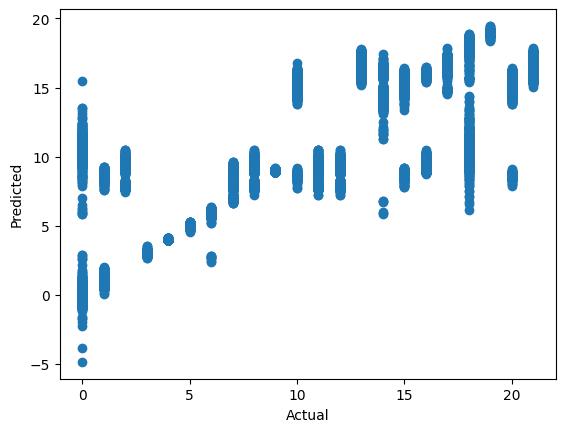

In [32]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

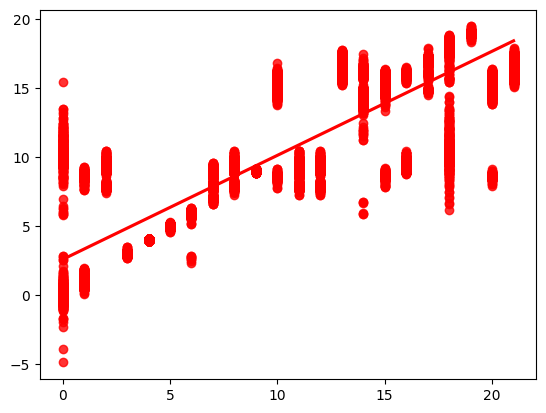

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,6,5.568482,0.431518
1,10,15.603789,-5.603789
2,17,16.961512,0.038488
3,5,5.044538,-0.044538
4,16,9.263234,6.736766
...,...,...,...
43995,0,0.111162,-0.111162
43996,7,7.781399,-0.781399
43997,4,3.973386,0.026614
43998,8,7.707712,0.292288


In [35]:
data = np.array([[6, 92, 4, 5, 93, 0, 0,93]])
prediction = Cat_model.predict(data)
print(int(prediction))

#apply labeldecode
decoded_data = label_encoder.inverse_transform([int(prediction)])

# Output the decoded data
print(decoded_data)

8
['lentil']
